In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt 

import sys
ROOT_DIR = "../"
sys.path.append(ROOT_DIR)

from data_analysis.hsic import run_hsic_analysis

plt.rcParams['figure.dpi'] = 100  # 360 for publication, 100 for notebook visualization
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['lines.linewidth'] = 1.5

In [2]:
dataset_id = "dyconex_251117"  # Default dataset
    
results = run_hsic_analysis(dataset_id=dataset_id)

2026-02-04 15:17:03,148 - INFO - Starting HSIC analysis for dataset: dyconex_251117
2026-02-04 15:17:03,160 - INFO - Loading data...
2026-02-04 15:17:03,635 - INFO - Loaded df_trg: (782267, 10)
2026-02-04 15:17:04,882 - INFO - Loaded df_input: (1554196, 19)
2026-02-04 15:17:04,882 - INFO - Computing slopes from target time-series...
2026-02-04 15:17:04,928 - INFO - Computing slopes for 1957 samples, 2 variables
2026-02-04 15:18:06,852 - WARNING - Skipped 1 (sample, variable) pairs with < 2 valid points
2026-02-04 15:18:06,855 - INFO - Computed slopes for 3913 (sample, variable) pairs
2026-02-04 15:18:06,862 - INFO - Slopes computed for 1957 samples
2026-02-04 15:18:06,862 - INFO - Slope columns: ['slope_delta_A_norm', 'slope_delta_B_norm']
2026-02-04 15:18:06,871 - INFO - Saved slopes_summary.csv
2026-02-04 15:18:06,872 - INFO - Extracting unique input parameters...
2026-02-04 15:18:08,034 - INFO - Found 2011 unique (process, occurrence, step, variable) combinations
2026-02-04 15:18:08

In [60]:
baseline = results["baseline_delta_A_norm"].loc[[results["baseline_delta_A_norm"]["hsic_score"].argmax()]]
baseline_value = baseline["hsic_score"].item()
baseline_signal = baseline["description"]

In [53]:
df = results['hsic_delta_A_norm']
df = df[df["hsic_score"] < 1.0]
df.head()

,param_name,process,occurrence,step,variable,hsic_score,valid_samples,rank
1542,Multibond_1_2.0_mul_60,Multibond,1,2.0,mul_60,0.094008,238,5.0
936,Galvanic_3_2.0_gal_199,Galvanic,3,2.0,gal_199,0.090970,212,6.0
1754,Multibond_2_2.0_mul_46,Multibond,2,2.0,mul_46,0.085021,241,7.0
1073,Laser_1_1.0_las_17,Laser,1,1.0,las_17,0.080206,153,8.0
1790,Multibond_2_2.0_mul_94,Multibond,2,2.0,mul_94,0.077243,241,9.0


<Axes: xlabel='hsic_score', ylabel='Count'>

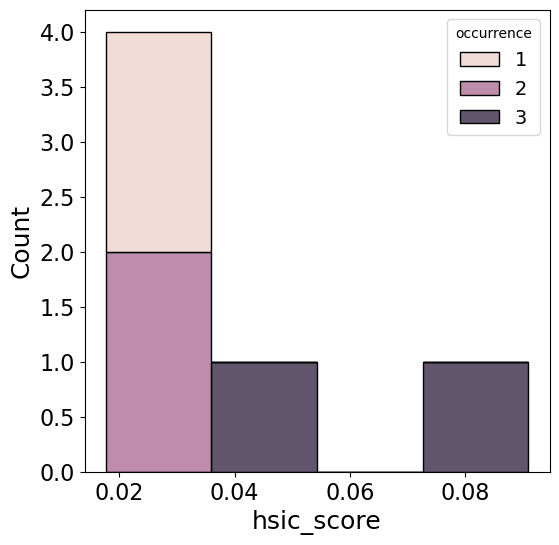

In [50]:
sns.histplot(data=df[df["variable"]=="gal_199"], x="hsic_score", hue="occurrence", multiple="stack")

In [41]:
df_average = df.groupby(["process", "variable"]).agg({
    "hsic_score":["mean", "std"]
    }).reset_index()

df_average.head()

process variable hsic_score          
                           mean       std
0  Galvanic  gal_100   0.001302  0.002300
1  Galvanic  gal_102   0.001557  0.002491
2  Galvanic  gal_105   0.001302  0.002300
3  Galvanic  gal_107   0.001909  0.002957
4  Galvanic  gal_110   0.001302  0.002300

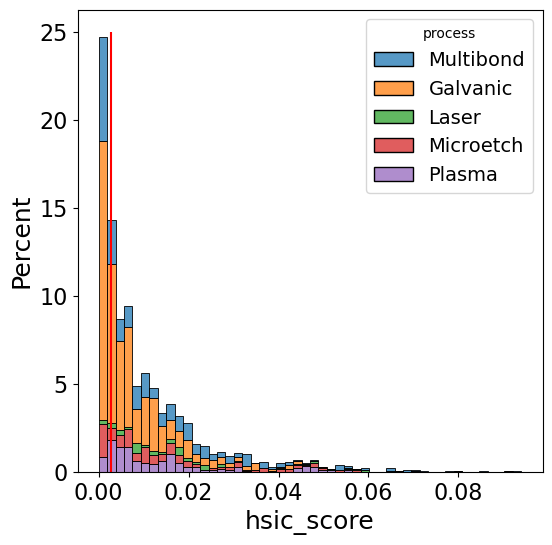

In [51]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="hsic_score", hue="process", multiple="stack", ax=ax, stat="percent", bins=50)
ax.vlines(baseline_value, ymin=0, ymax=25, colors="red")


In [65]:
df_signal = df[df["hsic_score"] > baseline_value]
df_noise = df[df["hsic_score"] < baseline_value]
df_noise.head()

,param_name,process,occurrence,step,variable,hsic_score,valid_samples,rank
499,Galvanic_2_1.0_gal_372,Galvanic,2,1.0,gal_372,0.002698,1007,1291.0
500,Galvanic_2_1.0_gal_373,Galvanic,2,1.0,gal_373,0.002698,1007,1291.0
1642,Multibond_2_1.0_mul_43,Multibond,2,1.0,mul_43,0.002689,1401,1293.0
166,Galvanic_1_1.0_gal_80,Galvanic,1,1.0,gal_80,0.002674,1382,1294.0
450,Galvanic_2_1.0_gal_281,Galvanic,2,1.0,gal_281,0.002669,1011,1295.0


In [80]:
signal_vars = df_signal["variable"].unique()
noise_vars = df_noise["variable"].unique()
all_vars = set(signal_vars) | set(noise_vars)
signal_noise_vars = set(signal_vars) & set(noise_vars)
signal_only_vars = set(signal_vars) - set(noise_vars)
noise_only_vars = set(noise_vars) - set(signal_vars)

In [81]:
print(len(all_vars))
print(len(signal_noise_vars))
print(len(signal_only_vars))
print(len(noise_only_vars))

351
208
128
15


In [82]:
noise_only_vars

{'mul_111',
 'mul_112',
 'mul_113',
 'mul_13',
 'mul_14',
 'mul_21',
 'mul_22',
 'mul_33',
 'mul_41',
 'mul_65',
 'mul_71',
 'mul_72',
 'mul_73',
 'mul_89',
 'mul_97'}